# Notebook Details:

- Data Exploration of Raw Polls Data set
- Feature eng - Playing with Spacy model to see what we can extract from "comment" - paid by political candidate or organization (lots of news orgs or candidates) - see here for more details on the capability used https://spacy.io/models/en
- [Context](https://www.pbs.org/newshour/politics/how-georgias-senate-runoff-election-between-walker-and-warnock-will-work) for year and race data difference - GA Runoff Election 
- 

## Imports

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_extraction import state_agg, imputed_600

In [2]:
polls = pd.read_csv('../data/raw-polls.csv')
polls.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,...,-31.0,11/3/1998,33.16,54.32,-21.15,9.85,-9.85,1.0,1.461561,for New York Daily News | WABC-TV (New York)
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,...,-15.0,11/3/1998,44.69,50.05,-5.36,9.64,-9.64,1.0,4.285789,NaN
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,...,5.0,11/3/1998,47.86,47.77,0.09,4.91,4.91,1.0,-1.023784,for unspecified Democratic sponsor
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,...,-8.0,11/3/1998,54.62,44.08,10.54,18.54,-18.54,0.0,10.064104,for New York Daily News | WABC-TV (New York)
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,...,4.0,11/3/1998,54.62,44.08,10.54,6.54,-6.54,1.0,-1.972391,for Charles E. Schumer


In [34]:
#trying to figure out the difference between year and election date column - any differences? yes
#The reason is because GA runoff elections in 2020 spilled into January 2021
mismatched_rows = polls['electiondate'].str.split('/').apply(lambda x: x[2]).astype(int) == polls['year']
# Display the mismatched rows
mismatched_rows.value_counts()

True     10742
False       34
Name: count, dtype: int64

In [33]:
mismatched_rows = polls['electiondate'].str.split('/').apply(lambda x: x[2]).astype(int) != polls['year']

# Filter the DataFrame to show rows where the condition is False
mismatched_data = polls[mismatched_rows]

# Display the values where the condition is False
mismatched_data

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment
10742,73801,138449,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,Emerson College,88,...,-2.4,1/5/2021,51.04,48.96,2.08,4.48,-4.48,0.0,0.383950,NaN
10743,73835,138504,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,Trafalgar Group,338,...,-6.7,1/5/2021,51.04,48.96,2.08,8.78,-8.78,0.0,5.204680,for unspecified Republican sponsor
10744,73801,138448,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,Emerson College,88,...,-2.0,1/5/2021,50.61,49.39,1.23,3.23,-3.23,0.0,-0.704207,NaN
10745,73835,138503,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,Trafalgar Group,338,...,-2.7,1/5/2021,50.61,49.39,1.23,3.93,-3.93,0.0,0.170134,for unspecified Republican sponsor
10746,73888,138629,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,Reconnect Research/Probolsky Research,651,...,1.0,1/5/2021,51.04,48.96,2.08,1.08,-1.08,1.0,-2.661588,NaN
10747,73860,138541,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,SurveyUSA,325,...,7.0,1/5/2021,51.04,48.96,2.08,4.92,4.92,1.0,1.039906,for WXIA-TV
10748,73888,138628,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,Reconnect Research/Probolsky Research,651,...,-1.0,1/5/2021,50.61,49.39,1.23,2.23,-2.23,0.0,-1.229641,NaN
10749,73860,138540,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,SurveyUSA,325,...,5.0,1/5/2021,50.61,49.39,1.23,3.77,3.77,1.0,0.065023,for WXIA-TV
10750,73955,138742,7781,2020,2020_Sen-GSR_GA,GA,Sen-G,Sen-GSR,Mellman Group,205,...,3.0,1/5/2021,51.04,48.96,2.08,0.92,0.92,1.0,-3.132981,for unspecified Democratic sponsor
10751,73955,138741,8737,2020,2020_Sen-GR_GA,GA,Sen-G,Sen-GR,Mellman Group,205,...,3.0,1/5/2021,50.61,49.39,1.23,1.77,1.77,1.0,-2.006424,for unspecified Democratic sponsor


In [4]:
polls.shape

(10776, 33)

In [5]:
polls.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,...,-31.0,11/3/1998,33.16,54.32,-21.15,9.85,-9.85,1.0,1.461561,for New York Daily News | WABC-TV (New York)
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,...,-15.0,11/3/1998,44.69,50.05,-5.36,9.64,-9.64,1.0,4.285789,NaN
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,...,5.0,11/3/1998,47.86,47.77,0.09,4.91,4.91,1.0,-1.023784,for unspecified Democratic sponsor
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,...,-8.0,11/3/1998,54.62,44.08,10.54,18.54,-18.54,0.0,10.064104,for New York Daily News | WABC-TV (New York)
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,...,4.0,11/3/1998,54.62,44.08,10.54,6.54,-6.54,1.0,-1.972391,for Charles E. Schumer


In [6]:
#NEED CSV with spacy
# #Heat map exploring if being a ORG v Person is correlated with features like "rightcall" or "bias" - no strong correlations here 
# heatmap_data = polls[['bias', 'rightcall', 'error', 'org', 'person']]
# correlation_matrix = heatmap_data.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
# plt.title('Correlation Heatmap')
# plt.show();

In [7]:
#loading in our data set that has rating stats on pollsters
ratings = pd.read_csv('../data/pollster-ratings.csv')
ratings.head()

#matching up common poll rating id columns so I can merge
ratings.rename(columns={'Pollster Rating ID': 'pollster_rating_id'}, inplace=True)
ratings.head()

,Rank,Pollster,pollster_rating_id,Polls Analyzed,AAPOR/Roper,Banned by 538,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,...,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus-Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty
0,1,The New York Times/Siena College,448,95,yes,no,-1.192860,A+,1.006012,0.747368,...,4.043250,5.364792,-1.318429,-1.625523,-1.318372,94,1.243260,0.700506,3.575558,0.261188
1,2,Selzer & Co.,304,53,yes,no,-1.175911,A+,0.161120,0.811321,...,4.916848,5.959235,-1.039274,-1.622671,-1.000844,35,0.297645,-0.343495,5.288403,0.000000
2,3,Research & Polling Inc.,280,44,no,no,-0.965392,A+,-0.582568,0.886364,...,4.177286,5.548050,-1.367651,-1.938115,-1.183301,43,-0.956078,0.632896,4.642076,0.286276
3,4,SurveyUSA,325,856,no,no,-0.917320,A+,0.003251,0.891355,...,4.681671,5.642531,-0.957747,-1.094410,-1.043528,697,0.003447,-0.526230,4.969035,0.126963
4,5,Marquette University Law School,195,15,yes,no,-0.908215,A/B,0.237527,0.800000,...,2.846556,5.938505,-3.088836,-3.191347,-1.208475,11,0.751227,-0.199840,4.201278,0.257600


In [8]:
#merging our poll data with pollster rating data - enriching so we have information like grade of pollster, etc
merged_df = pd.merge(polls, ratings, on='pollster_rating_id', how='left')
merged_df.head()

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus-Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,...,4.740100,5.234178,-0.490965,-2.175389,-0.421866,17.0,-3.425434,0.567141,4.544692,0.050743
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,...,4.199093,5.689016,-1.486810,-0.853513,-0.368557,30.0,-3.205671,-2.558033,3.438590,0.433143
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,...,8.428978,5.610426,2.821665,3.913602,1.008798,11.0,7.962182,6.893962,6.106365,0.000000
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,...,4.740100,5.234178,-0.490965,-2.175389,-0.421866,17.0,-3.425434,0.567141,4.544692,0.050743
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,...,5.391699,5.595187,-0.200375,-0.332816,-0.175144,33.0,3.537298,4.275848,5.201474,0.036066


In [9]:
#checking the shape to see if merged correctly
merged_df.shape

(10776, 53)

In [10]:
#checking the shape to see if merged correctly
polls.shape

(10776, 33)

In [11]:
#NEED CSV with spacy
#Scatter plot exploring if Bias changes over the years with color coordination on Org vs Person
# scatter_data = polls[['year', 'bias', 'person', 'org']]

# plt.figure(figsize=(10, 6))
# scatter = plt.scatter(scatter_data['year'], scatter_data['bias'], 
#                       c=scatter_data['person'].map({1: 'red', 0: 'green'}),
#                       alpha=0.5)

# # Adding a legend for the colors
# legend_labels = ['Person', 'Org']
# plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)

# plt.title('Year vs. Bias')
# plt.xlabel('Year')
# plt.ylabel('Bias')
# plt.grid(True)
# plt.show();

In [12]:
#grouping type of race by mean bias and count of polls 
polls.groupby(['year', 'type_simple'])['bias'].agg(['mean', 'count'])

mean  count
year type_simple                 
1998 Gov-G       -5.794870    115
     House-G     -1.175439     57
     Sen-G       -4.204706    102
1999 Gov-G       -4.292500      4
2000 Gov-G       -0.364419     43
...                    ...    ...
2020 Gov-G        7.233421     38
     House-G      6.372800    100
     Pres-G       4.077831    590
     Pres-P            NaN      0
     Sen-G        4.836454    282

[68 rows x 2 columns]

In [13]:
#showing what races sorted largest to smallest ab value had the largest bias
result = polls.groupby(['year', 'type_simple'])['bias'].agg(['mean', 'count'])
result['mean_abs'] = result['mean'].abs()
result_sorted = result.sort_values(by='mean_abs', ascending=False)
# result_sorted = result_sorted.drop(columns=['mean_abs'])
result_sorted

mean  count   mean_abs
year type_simple                             
2015 House-G      22.950000      1  22.950000
2013 House-G      10.925000      4  10.925000
2020 Gov-G         7.233421     38   7.233421
     House-G       6.372800    100   6.372800
2019 House-G       6.182500      4   6.182500
...                     ...    ...        ...
2004 Pres-P             NaN      0        NaN
2008 Pres-P             NaN      0        NaN
2012 Pres-P             NaN      0        NaN
2016 Pres-P             NaN      0        NaN
2020 Pres-P             NaN      0        NaN

[68 rows x 3 columns]

In [14]:
#number of polls per race
value_counts_per_type = polls['type_simple'].value_counts()
value_counts_per_type

type_simple
Pres-G     2940
Sen-G      2651
Pres-P     1821
Gov-G      1712
House-G    1652
Name: count, dtype: int64

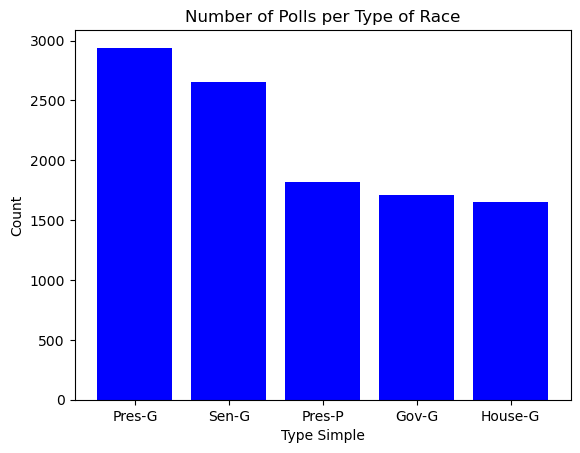

In [15]:
#Bar Chart of Number of Polls per Type of Race 
categories = ['Pres-G', 'Sen-G', 'Pres-P', 'Gov-G', 'House-G']
values = [2940, 2651, 1821, 1712, 1652]
mean_value = sum(values) / len(values)
plt.bar(categories, values, color='blue')
plt.title('Number of Polls per Type of Race')
plt.xlabel('Type Simple')
plt.ylabel('Count')

# Display the chart
plt.show();

#showing us that General Presidental pollings has the most number of polls followed by General Senate polling. Primary, Governor, and House polling has less polls, probably because less demand/readership of these races compared to Presidental and Senate races.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


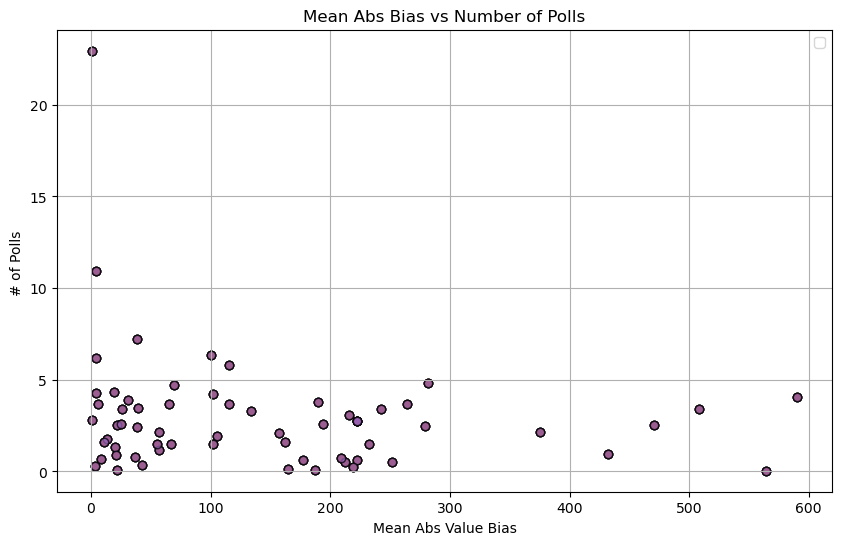

In [16]:
#exploring the relationship between Mean Abs Bias and count of polls - more bias with less number of polls completed? Looks like small downtrend .. may include a regression line here 
plt.figure(figsize=(10, 6))
for race, group in polls.groupby('type_simple'):
    plt.scatter(
        result['count'],
        result['mean_abs'],
        alpha=0.7,
        edgecolors='k')

# Add labels and title
plt.xlabel('Mean Abs Value Bias')
plt.ylabel('# of Polls ')
plt.title('Mean Abs Bias vs Number of Polls')
plt.legend()

# Show the plot
plt.grid(True)
plt.show();

In [17]:
#checking out how many pollsters were put into certain grade categories
ratings['538 Grade'].value_counts()[sorted(ratings['538 Grade'].unique())]

538 Grade
A        8
A+       4
A-       9
A/B     47
B       10
B+      11
B-       9
B/C    382
C        4
C+       2
C-       1
C/D     19
F       11
Name: count, dtype: int64

In [18]:
#we have too drop some NAs because not all polls had corresponding pollster rating data
merged_df_cleaned = merged_df.dropna(subset=['538 Grade'])

In [19]:
#creating this as a sorting function for chart
valuecountsbygrade = merged_df_cleaned['538 Grade'].value_counts()

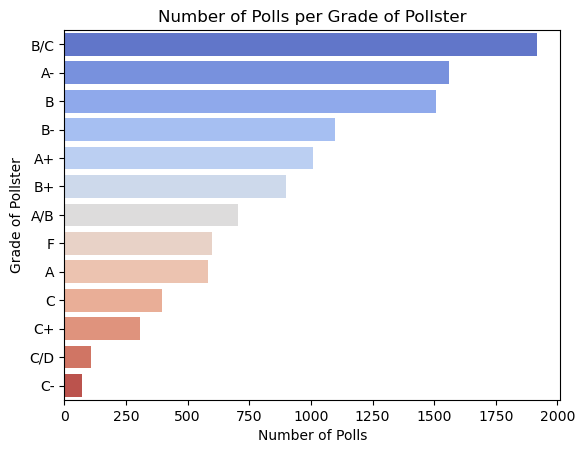

In [20]:
#exploring number of polls per grade of pollster 
sorted_grades = valuecountsbygrade.index
sns.barplot(x=merged_df_cleaned['538 Grade'].map(valuecountsbygrade), y=merged_df_cleaned['538 Grade'],order=sorted_grades, palette='coolwarm')

# Display the plot
plt.title('Number of Polls per Grade of Pollster')
plt.xlabel('Number of Polls')
plt.ylabel('Grade of Pollster')
plt.show();

In [21]:
#creating this as a sorting function for chart
sorted_grades2 = merged_df_cleaned['538 Grade'].value_counts()[['A+', 'A', 'A-', 'A/B', 'B+', 'B', 'B-', 'B/C', 'C+', 'C', 'C-', 'C/D', 'F']]

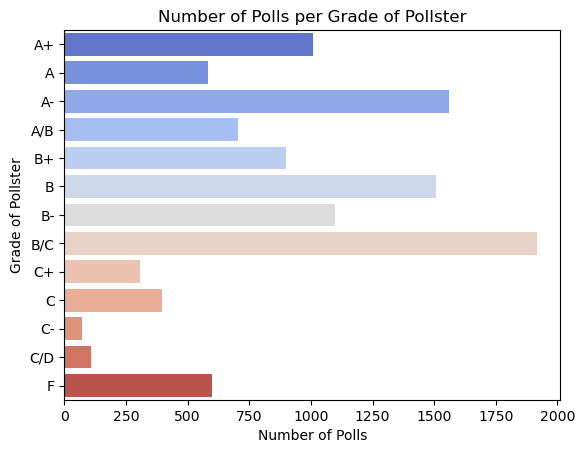

In [22]:
#exploring number of polls per grade of pollster  - sorted by grade vs number of polls
sorted_grades2 = sorted_grades2.index
sns.barplot(x=merged_df_cleaned['538 Grade'].map(valuecountsbygrade), y=merged_df_cleaned['538 Grade'], order=sorted_grades2, palette='coolwarm')

# Display the plot
plt.title('Number of Polls per Grade of Pollster')
plt.xlabel('Number of Polls')
plt.ylabel('Grade of Pollster')
plt.show();